# **Hate Speech Detector using MLP**

**Shayling Zhao**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reading in CSV file using pandas and converting author column to categorical data. Displaying first few rows and counts:**


In [ ]:
data = pd.read_csv("hatespeech.csv") # Read in csv file
data["label"] = data["label"].astype('category') # Convert to category
print(data.dtypes) # Check data types
data.head() # Print first few rows
print("\n")
print(data.head()) # Printing first few lines of file
print("\n")
count = data['label'].value_counts() # Running count of type freqency
print('Frequency of Hate Speech (1) and No Hate Speech (0):\n\n', count) 

Unnamed: 0       int64
text            object
label         category
dtype: object


   Unnamed: 0                                               text label
0           0  It should be legal for a husband to rape his wife     1
1           1                            dalits are lowlife scum     1
2           2                                dalits are lowlives     1
3           3  It was a better world when women dare not ques...     1
4           4  I don't work this hard so that those immigrant...     1


Frequency of Hate Speech (1) and No Hate Speech (0):

 0    48219
1    24366
Name: label, dtype: int64


**Dividing into training and testing data with 80% in traing data, using random state 1234. Display the shape of train and test:**

In [ ]:
X = data.text # Setting text as the X variable
y = data.label # Setting the category as the y variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.2, train_size = 0.8, random_state = 1234)
print(X_train.shape) # shape of train
print(X_test.shape) # shape of test

(58068,)
(14517,)


**Processing text by removing stop words and performing tf-idf vectorization (transforms text into data and scales the data). Fitting to the training data only and applying to train and test. Outputting the training and test set shape:**

In [ ]:
stopwords = set(stopwords.words('english')) # Set stopwords
# Removing stopwords when applying vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords, 
                     max_features=1000, ngram_range=(1,2))
# Fitting and transforming training data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test) # Transforming testing data
print(X_train.shape) # shape of train
print(X_test.shape) # shape of test

(58068, 1000)
(14517, 1000)


# **Trying Neural Network using MLP and different topologies:**

**We see here that accuracy is pretty high (around 77%):**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlpnn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=100,
                   hidden_layer_sizes=(15, 8, 4), random_state=1)
mlpnn.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, pred, zero_division=1))

accuracy score:  0.765447406488944


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      9633
           1       0.66      0.61      0.64      4884

    accuracy                           0.77     14517
   macro avg       0.74      0.73      0.73     14517
weighted avg       0.76      0.77      0.76     14517



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Adding more neurons to each layer lowers accuracy score by only about 0.0003:**

In [ ]:
mlpnn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=50,
                   hidden_layer_sizes=(15, 8, 4, 2), random_state=1)
mlpnn.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, pred, zero_division=1))

accuracy score:  0.7651029827099263


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      9633
           1       0.64      0.70      0.67      4884

    accuracy                           0.77     14517
   macro avg       0.74      0.75      0.74     14517
weighted avg       0.77      0.77      0.77     14517



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Adding more neurons to each layer increases accuracy score only by 0.01:**

In [ ]:
mlpnn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=50,
                  hidden_layer_sizes=(30, 20, 15), random_state=1)
mlpnn.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, pred, zero_division=1))


accuracy score:  0.7560101949438589


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      9633
           1       0.64      0.61      0.63      4884

    accuracy                           0.76     14517
   macro avg       0.73      0.72      0.72     14517
weighted avg       0.75      0.76      0.75     14517



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Now let's have both a lot of neurons as well as 4 layers and see what happens:**

In [ ]:
mlpnn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=50,
                hidden_layer_sizes=(30, 20, 15, 10), random_state=1)
mlpnn.fit(X_train, y_train)

pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, pred, zero_division=1))

accuracy score:  0.765447406488944


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      9633
           1       0.66      0.61      0.64      4884

    accuracy                           0.77     14517
   macro avg       0.74      0.73      0.73     14517
weighted avg       0.76      0.77      0.76     14517



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# **Plotting ROC Curve**

**The "True Positive Rates" (also known as "sensitivity") are on the Y-axis, and the "False Positive Rates" (also known as 1-specificity) are on the X-axis.**

**ROC = Receiver Operating Characteristic.**

**AUROC = Area under the ROC curve.**

**Prediction Probability Matrix:**

In [ ]:
worst_probs = [0 for _ in range(len(y_test))] # This is a baseline. Will contain 0, or worst case scenario.
mlpnn_probs = mlpnn.predict_proba(X_test) # Probability of predicted values by MLP model
mlpnn_probs = mlpnn_probs[:, 1] # Keep probabilities from positive outcomes

**Computing AUROC and ROC curve values:**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Computing AUROC:
worst_auc = roc_auc_score(y_test, worst_probs)
mlpnn_auc = roc_auc_score(y_test, mlpnn_probs)

# Printing AUROC Scores:
print('Random chance predicion aka worst scenario: AUROC = %.3f' % (worst_auc))
print('Random MLP: AUROC = %.3f' % (mlpnn_auc))

Random chance predicion aka worst scenario: AUROC = 0.500
Random MLP: AUROC = 0.852


**ROC Curve:**

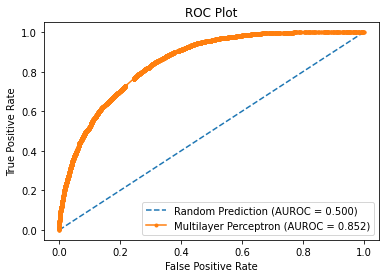

In [ ]:
# Calculating the curve with false positive rates and true positive rates:
worst_fpr, worst_tpr, _ = roc_curve(y_test, worst_probs)
mlpnn_fpr, mlpnn_tpr, _ = roc_curve(y_test, mlpnn_probs)

#Plotting the curve:
import matplotlib.pyplot as plt
plt.plot(worst_fpr, worst_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % worst_auc)
plt.plot(mlpnn_fpr, mlpnn_tpr, marker='.', label='Multilayer Perceptron (AUROC = %0.3f)' % mlpnn_auc)
plt.title('ROC Plot') # Title
plt.xlabel('False Positive Rate') # X-axis label
plt.ylabel('True Positive Rate') # Y-axis label
plt.legend() # Show Legend
plt.show() # Show Plot